# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

### Data Preparation

After importing the dependencies matplotlib.pyplot as plt, pandas as pd I loaded the data from two csv files called **study_results.csv**, and **mouse_metadata.csv.** We then merged the two DataFrames into **mouse_study_df.**  

I examined the data ascertain the number of rows and columns, and noted the dtypes in each one. the DataFrame. **mouse_study_df** linked a group of sick male and female mice suffering from tumors being treated for their tumors with various drug regiments over a 45 day period. Each mouse was weighed and volume of their tumor measure every 5 days. It was suspected that there was a duplicat data point in the data set. 

I was instructed to to find this duplicate entry so I could remove it. I found the first time/measurement point for Mouse ID **g989** on rows 860 and 861 was duplicateded and needed to be removed. I also found that several measurement had been duplicated. I dropped the duplication mouse by it's Mouse ID. I confirmed that there were now 248 unique mice in the study.

### Summary Statistics

The instructions asked to calculate the **Summary Statistics** for each of the drug regimens for the **Tumor Volumes (mmm3)** in two ways. The **Summary Statistics** referred to were **Mean Tumor Volume**, **Median Tumor Volume**, **Tumor Volume Variance**, **Tumor Volume Standard Deviation**, and **Tumor Volume Standard Error**

The first way was by using standard python code. I did it by grouping clean_mouse_study_df by 'Drug Regimen', and then caculating each of the statistics by grouping the data grouped on **Drug Regimen** by **Tumor Volume (mm3)**. The second way was by using the aggregate method using the aggregate method. Both methods gave the same result.

### Bar and Pie Charts

The first **Bar Chart** was plotted using **Pandas**. It showed the **Total Number** of **Mouse Timepoints** for each **Drug Regimen.**. The question arose as to why some druge regimens had less time point observations than others. There was no answer apparent for this difference.

The second Bar Chart was plotted using using pyplot. It prduced a similar plot, with the bars being wider than the pandas plot.

Another difference to the example profide was is that the examples were plotted with decreasing time points from left to right, while my plots had the **Drug Regimin's** in alphabetical order from left to right.

### Pie Chart

I generated two **pie charts** showing the distribution of **female versus male mice**. I made the first plot using **pandas**, and the second using **pyplot**. The charts show that almost **the same number of male and female mice to part in the project**. The two versions of the pie chart **appear to be identical**.

### Quartiles, Outliers, and Boxplots

I prepared the data to create a **Box Plot** to investigate the whether **outliers** may be present in the data set. I identified **one outlier** in the **four Drug Regimen's** that I examined. It is a **low reading in in the Infubnol Drug Reginmen** group, with a value of **36.321346**.

I generated a **Box Plot** that shows the **distrubution of the tumor volume** for each treatment group.

### Line Plot

I identified **all the mice** undergoing the **Capomulin Drug Regimen** and generated a plot **regimen tumor volume** vs**time point** for this mouse. I chose **Mouse ID m601**.

This chart shows that the **Tumor Volume of Mouse ID m601** reduced steadily during its treatment, suggesting that the **Capomulin Druge Regimen was benificial to the mouse's condition**.

### Scatter Plot

I generated a **scatter plot of mouse weight vs the average ovserved tumor volume** for the entire **Capomin Drug Regimen**. Visually is appears to show that a positive correlation between the mouse's weight and and the average Tumor voulume.

### Correlation and Regression.  

I calculated the correlation coefficient and a lineart regression model for the mouse weight and the average observed **tumor volume for the entire Capomulin Drug Regimen**. I found the **correlation ceofficient between mouse weight and average tumor volume is 0.84. The Linear Regression Model equation is y = 0.95x + 21.55. This is clear evidence of the positive correlation between the weight of mice, and the volume of their tumor.

### References
 
While working with Module 5 - Matplotlib - Challenge I used the following references:
Course Notes
Pandas Tutorial - https://www.w3schools.com/python/pandas/default.asp
Community Tutorials -  https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html
Pandas, a Complete Introduction - https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/
Pandas Tutorials, Pandas Data Analysis in Python (11 Videos) - Corey Schafer - Youtube.
Matplotlib Tutorials - Lamplotlib Creating Charts (10 Videos - Corey Schafer - Youtube


In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path ='data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results_df, mouse_metadata_df, on='Mouse ID', how='inner')

# Display the data table for preview
mouse_study_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [10]:
# Checking the number of mice.
number_of_mice = mouse_study_df['Mouse ID'].nunique()

number_of_mice

249

In [11]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

duplicates.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26


In [14]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids = duplicates['Mouse ID'].unique()
all_duplicate_data_df = mouse_study_df[mouse_study_df['Mouse ID'].isin(duplicate_mouse_ids)]

all_duplicate_data_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse_study_df = mouse_study_df[mouse_study_df['Mouse ID'] != 'g989']


In [16]:
# Checking the number of mice in the clean DataFrame.

number_of_mice_clean = clean_mouse_study_df['Mouse ID'].nunique()

print("Number of unique mice in clean Data Frame:", number_of_mice_clean)

Number of unique mice in clean Data Frame: 248


## Summary Statistics

In [84]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

grouped_drug_df = clean_mouse_study_df.groupby('Drug Regimen')

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = grouped_drug_df['Tumor Volume (mm3)'].mean()
median = grouped_drug_df['Tumor Volume (mm3)'].median()
variance = grouped_drug_df['Tumor Volume (mm3)'].var()
std_dev = grouped_drug_df['Tumor Volume (mm3)'].std()
sem = grouped_drug_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_volume_summary_df = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev.': std_dev,
    'Tumor Volume SEM': sem
})

#print tumor_volume_summary_df

tumor_volume_summary_df




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [85]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

tumor_volume_summary_aggregate_df = grouped_drug_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Renaming the columns to agree with instructions.

tumor_volume_summary_aggregate_df.columns = [
    'Mean Tumor Volume',
    'Median Tumor Volume',
    'Tumor Volume Variance',
    'Tumor Volume Std. Dev.',
    'Tumor Volume SEM'
]

tumor_volume_summary_aggregate_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

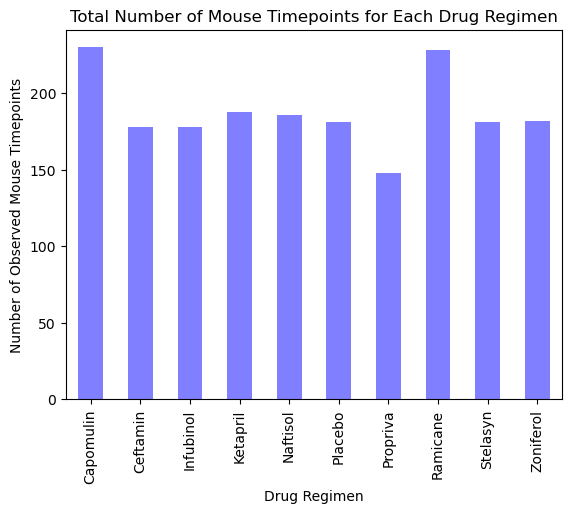

In [86]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Calculate the total number of rows for each Drug Regimen

count_by_regimen = grouped_drug_df.size()

# Generate the bar plot

count_by_regimen.plot(kind='bar', color='blue', alpha = 0.50)

# Adding labels and title 

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.title('Total Number of Mouse Timepoints for Each Drug Regimen')

plt.xticks(rotation=90)

# Display the plot

plt.show()




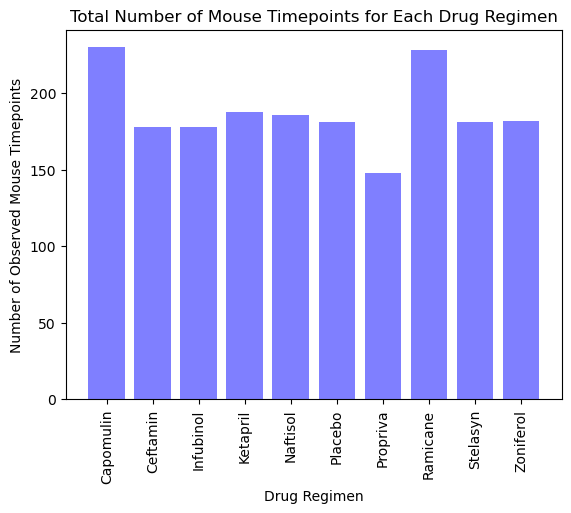

In [87]:

# Calculate the counts for each drug regimen
regimen_counts = grouped_drug_df.size()

# Create the x-axis labels (drug regimens) and the heights for the bars (counts)
regimen_labels = regimen_counts.index
counts = regimen_counts.values

# Create the bar chart
plt.bar(regimen_labels, counts, color='blue', alpha=0.50)

# Adding labels and title for clarity
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.title('Total Number of Mouse Timepoints for Each Drug Regimen')

# Customizing the ticks and x-axis label angles
plt.xticks(rotation=90)

# Display the plot
plt.show()

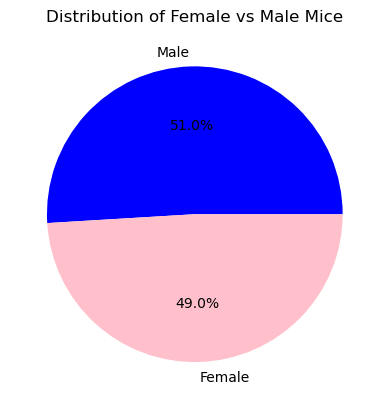

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Calculate the counts of each sex
sex_distribution = clean_mouse_study_df['Sex'].value_counts()

# Generate the pie chart
sex_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=0, colors=['blue', 'pink'])

# Adding a title for clarity
plt.title('Distribution of Female vs Male Mice')

# Hide the y-label ('Sex')
plt.ylabel('')

# Display the plot
plt.show()

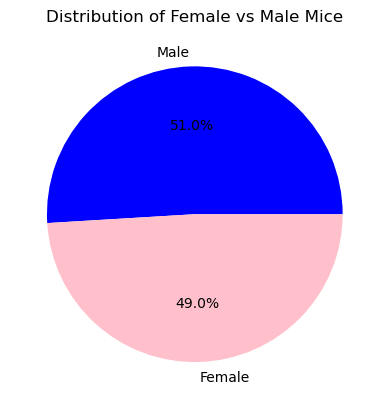

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Calculate the counts of each sex
sex_distribution = clean_mouse_study_df['Sex'].value_counts()

# Create the pie chart with an alpha value using Pyplot
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', startangle=0, colors=['blue', 'pink'])

# Adding a title for clarity
plt.title('Distribution of Female vs Male Mice')

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [90]:

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

treatment_filter = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = clean_mouse_study_df[clean_mouse_study_df['Drug Regimen'].isin(treatment_filter)]

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint_df = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_tumor_df = pd.merge(last_timepoint_df, clean_mouse_study_df, on=['Mouse ID', 'Timepoint'], how='left')


In [91]:

# Put treatments into a list for for loop (and for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Example for Capomulin

for drug in treatment_list:
    
    # Locate the rows for each treatment and get the tumor volumes
    
    drug_df = merged_tumor_df.loc[merged_tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # Add subset
    
    tumor_volumes.append(drug_df)
    
           
    # Calculate quartiles and IQR

    quartiles = drug_df.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)


    # Determine outliers
    outliers = drug_df[(drug_df < lower_bound) | (drug_df > upper_bound)]
    
    # Print the results
    
    print(f"{drug}'s potential outliers: {outliers}")
    
    


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


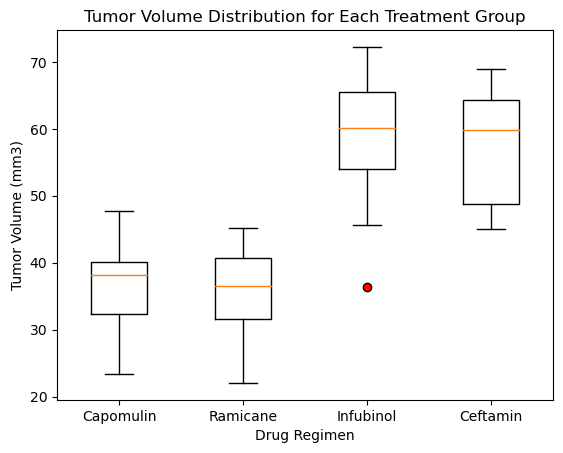

In [92]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_volumes, labels=treatment_list, flierprops=dict(markerfacecolor="red", marker ='o'))

# Adding titles and labels
plt.title('Tumor Volume Distribution for Each Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')

# Display the plot
plt.show()


In [99]:
# Filter for Capomulin
capomulin_df = clean_mouse_study_df[clean_mouse_study_df['Drug Regimen'] == 'Capomulin']

# Get unique Mouse IDs treated with Capomulin
capomulin_mice = capomulin_df['Mouse ID'].unique()

# Identify mice undergoing the Capomulin Drug Regimen
print(capomulin_mice)

['b128' 'j246' 'r554' 's185' 'b742' 'x401' 'l509' 's710' 'r157' 'u364'
 'j119' 'v923' 'w914' 'i738' 'r944' 'y793' 'g316' 'g288' 'l897' 'w150'
 't565' 'i557' 'm957' 'f966' 'm601']


## Line and Scatter Plots

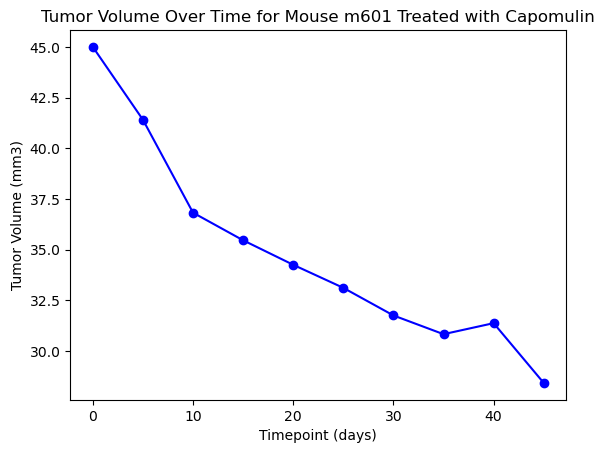

In [102]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_m601_data = capomulin_df[capomulin_df['Mouse ID'] == 'm601']

# Plotting tumor volume vs. time point
plt.plot(mouse_m601_data['Timepoint'], mouse_m601_data['Tumor Volume (mm3)'], marker='o', color='blue')

# Adding titles and labels
plt.title('Tumor Volume Over Time for Mouse m601 Treated with Capomulin')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()

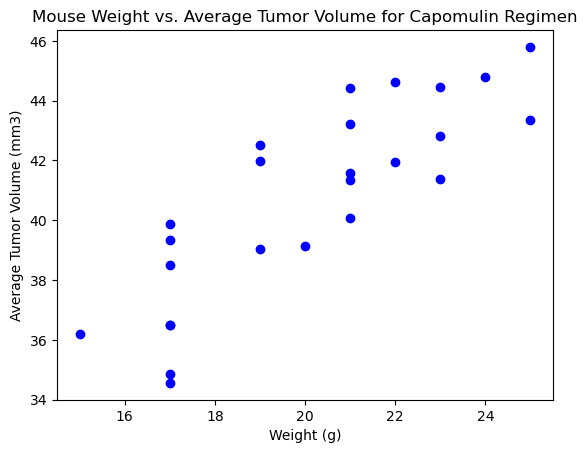

In [107]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_df = clean_mouse_study_df[clean_mouse_study_df['Drug Regimen'] == 'Capomulin']

avg_tumor_vol_by_mouse = capomulin_df.groupby('Mouse ID').agg(
    Average_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Weight=('Weight (g)', 'mean'))  # Assuming the weight doesn't change much, take mean

# Scatter plot of mouse weight vs average tumor volume
plt.scatter(avg_tumor_vol_by_mouse['Weight'], avg_tumor_vol_by_mouse['Average_Tumor_Volume'], color = "blue")

# Adding titles and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()



## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is: 0.84


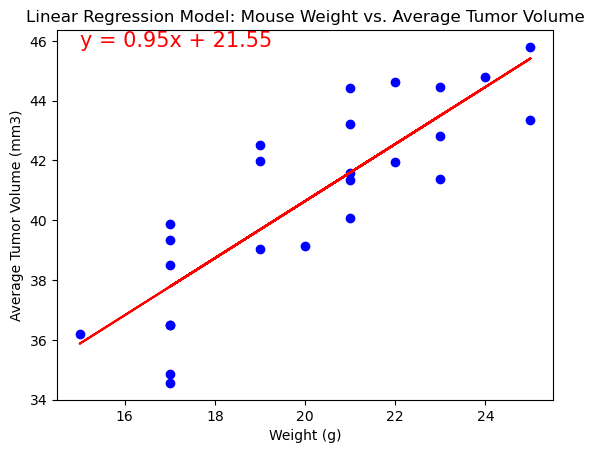

In [109]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the Pearson correlation coefficient
correlation = st.pearsonr(avg_tumor_vol_by_mouse['Weight'], avg_tumor_vol_by_mouse['Average_Tumor_Volume'])[0]

print(f"The correlation coefficient between mouse weight and average tumor volume is: {correlation:.2f}")

# Perform a linear regression on weight vs. average tumor volume
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_tumor_vol_by_mouse['Weight'], avg_tumor_vol_by_mouse['Average_Tumor_Volume'])

# Get regression values
regress_values = avg_tumor_vol_by_mouse['Weight'] * slope + intercept

# Create a scatter plot of the data
plt.scatter(avg_tumor_vol_by_mouse['Weight'], avg_tumor_vol_by_mouse['Average_Tumor_Volume'], color='blue')

# Plot the linear model on top of scatter plot 
plt.plot(avg_tumor_vol_by_mouse['Weight'], regress_values, "r-")

# Annotate the plot with the linear equation
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (avg_tumor_vol_by_mouse['Weight'].min(), avg_tumor_vol_by_mouse['Average_Tumor_Volume'].max()), fontsize=15, color="red")

# Adding titles and labels
plt.title('Linear Regression Model: Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()
